#Initial Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn==1.2.2


In [ ]:
!pip install xgboost

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
import json
#from sklearn.ensemble import VotingRegressor

# Constants
DATA_PATH = "/content/drive/MyDrive/ml/"
ANNONIMIZED_FILE = DATA_PATH + "annonimized.csv"
TBTL_FILE = DATA_PATH + "tbtl-public.csv"
TH_PUBLIC_CSV = DATA_PATH + "th-public.csv"
TH_QT_CSV = DATA_PATH + "qt-public.csv"
TH_CK_CSV = DATA_PATH + "ck-public.csv"
OUTPUT_FILE = "result_tbtl.csv"


#Data Visualization


In [ ]:
# Step 1: Load and preprocess data
def load_and_preprocess_data():
    """
    Load data from CSV and Excel files, and preprocess column names.

    Returns:
        pd.DataFrame: Main dataset.
        pd.DataFrame: Score-related dataset.
    """
    df_annonimized = pd.read_csv(ANNONIMIZED_FILE)
    df_tbtl = pd.read_csv(TBTL_FILE)
    df_th= pd.read_csv(TH_PUBLIC_CSV)
    df_qt = pd.read_csv(TH_QT_CSV)
    df_ck = pd.read_csv(TH_CK_CSV)


    # Standardize column names
    df_annonimized.rename(columns={
        "concat('it001',`assignment_id`)": 'assignment_id',
        "concat('it001',`problem_id`)": 'problem_id',
        "concat('it001', username)": 'username',
        "concat('it001',`language_id`)": 'language_id'
    }, inplace=True)

    df_tbtl.rename(columns={"hash": 'username', "TBTL": 'TBTL'}, inplace=True)
    df_qt.rename(columns={"hash": 'username', "diemqt": 'QT'}, inplace=True)
    df_ck.rename(columns={"hash": 'username', "CK": 'CK'}, inplace=True)
    df_th.rename(columns={"hash": 'username', "TH": 'TH'}, inplace=True)

    return df_annonimized, df_tbtl, df_th , df_qt, df_ck

In [ ]:
df_annonimized, df_tbtl, df_th , df_qt , df_ck = load_and_preprocess_data()

In [ ]:
df_tbtl

,username,TBTL
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.24
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.11
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7.30
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,8.63
4,013de369c439ab0ead8aa7da64423aa395a8be39,8.20
...,...,...
794,840d07858c03f80f4695056e2cc7d0c474b83a25,7.67
795,844f5db2e7e31ae51eba025480679ed7e4708ac6,7.54
796,845acd04a77b3d1b623f255d9f9f8eae90892dab,7.49
797,8460eaaf887a6289fb156f7562fb739ba8e9629e,8.94


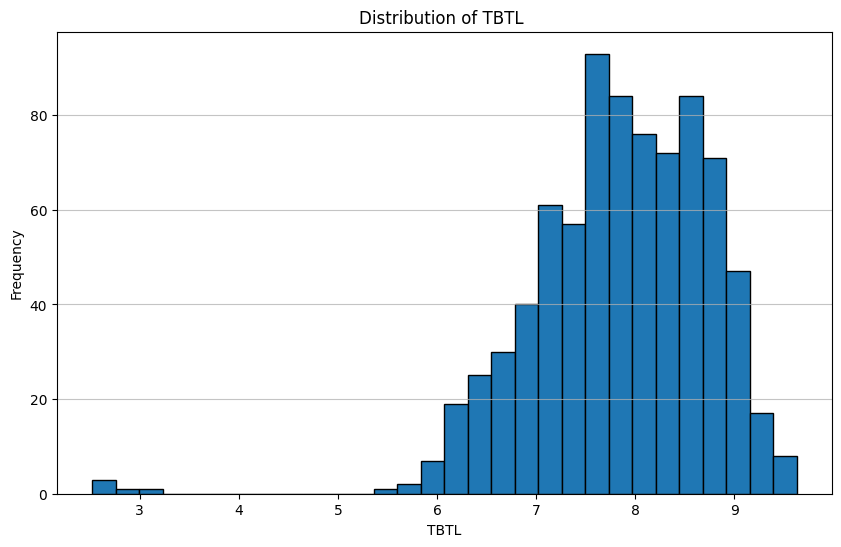

In [ ]:
# prompt: Sử dụng dataframe df_tbtl: plot distribution of TBTL with sorted value by float

import pandas as pd
import matplotlib.pyplot as plt
# Sort the dataframe by TBTL values
df_tbtl_sorted = df_tbtl.sort_values(by='TBTL')

# Create the distribution plot
plt.figure(figsize=(10, 6))
plt.hist(df_tbtl_sorted['TBTL'], bins=30, edgecolor='black')
plt.xlabel('TBTL')
plt.ylabel('Frequency')
plt.title('Distribution of TBTL ')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
df_th

,username,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,6
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,6
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,8.5
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,5.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10


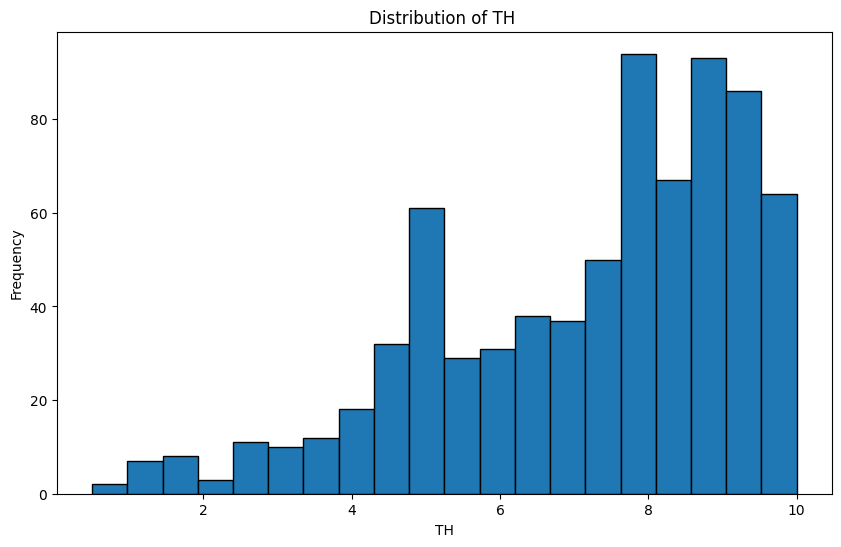

In [ ]:
# prompt: Sử dụng dataframe df_th: plot distribution of TH with sorted value by float

import pandas as pd
import matplotlib.pyplot as plt
# Convert 'TH' column to numeric, coercing errors to NaN
df_th['TH'] = pd.to_numeric(df_th['TH'], errors='coerce')

# Sort values by 'TH'
df_th_sorted = df_th.sort_values(by='TH')

# Create the distribution plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(df_th_sorted['TH'], bins=20, edgecolor='black')  # Adjust bins as necessary
plt.xlabel('TH')
plt.ylabel('Frequency')
plt.title('Distribution of TH ')
plt.show()


In [ ]:
df_qt

,username,QT
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,7
2,01122b3ef7e59b84189e65985305f575d6bdf83c,9
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,9
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,8
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,6.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10


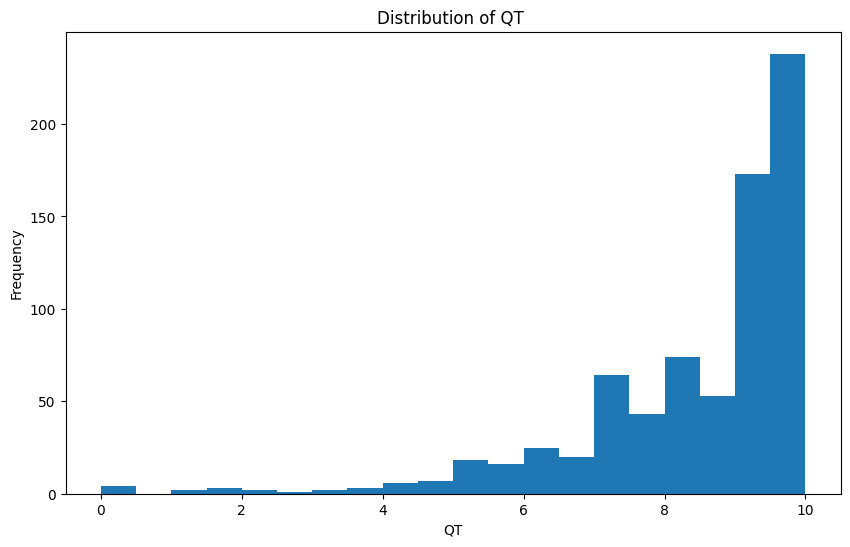

In [ ]:
# prompt: Sử dụng dataframe df_qt: plot distribution of QT with sorted value by float

import pandas as pd
import matplotlib.pyplot as plt
# Convert 'QT' column to numeric, handling potential errors
df_qt['QT'] = pd.to_numeric(df_qt['QT'], errors='coerce')
# Sort values by 'QT'
df_qt_sorted = df_qt.sort_values(by='QT')
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(df_qt_sorted['QT'], bins=20)
plt.xlabel('QT')
plt.ylabel('Frequency')
plt.title('Distribution of QT ')
plt.show()


In [ ]:
df_ck

,username,CK
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,5.5
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,6.0
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,6.0
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,7.0


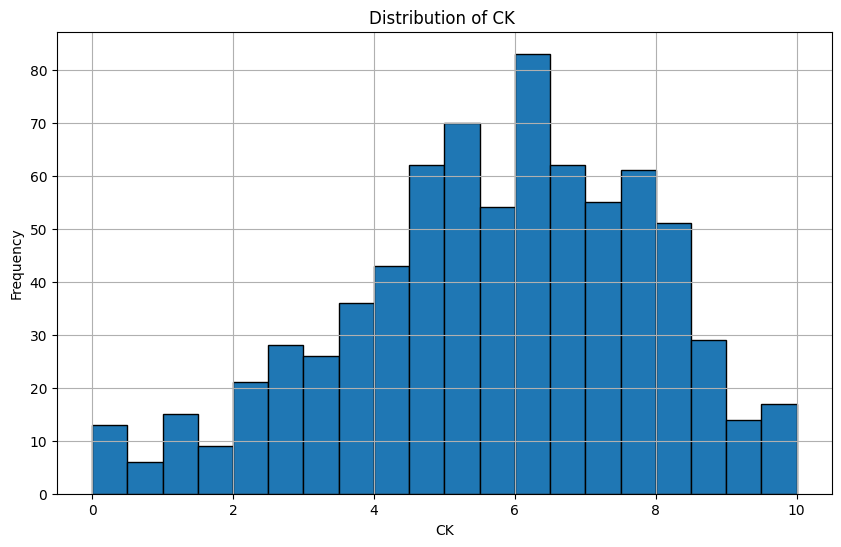

In [ ]:
# prompt: Sử dụng dataframe df_ck: plot distribution of CK with sorted value by float

import pandas as pd
import matplotlib.pyplot as plt
# Sort the dataframe by the 'CK' column in ascending order
df_ck_sorted = df_ck.sort_values(by='CK', ascending=True)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(df_ck_sorted['CK'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('CK')
plt.ylabel('Frequency')
plt.title('Distribution of CK ')
plt.grid(True)
plt.show()


In [ ]:
df_annonimized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language_id    295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [ ]:
df_annonimized.head()


,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


#Featuring

In [ ]:
# Step 2: Utility functions for feature engineering
def add_aggregated_feature(processed_df, source_df, new_feature_name, group_col, target_col, agg_func, filter_func=None):
    """
    Add an aggregated feature to the score DataFrame based on a source DataFrame.

    Parameters:
        processed_df (pd.DataFrame): Target DataFrame to which the new feature will be added.
        source_df (pd.DataFrame): Source DataFrame for computing the feature.
        new_feature_name (str): Name of the new feature.
        group_col (str): Column to group by.
        target_col (str): Column to aggregate.
        agg_func (str): Aggregation function (e.g., 'sum', 'mean').
        filter_func (callable, optional): Function to filter rows in the source DataFrame.

    Returns:
        pd.DataFrame: Updated score DataFrame with the new feature.
    """
    if filter_func:
        source_df = source_df[filter_func(source_df)]

    aggregated = source_df.groupby(group_col)[target_col].agg(agg_func).reset_index(name=new_feature_name)
    processed_df = pd.merge(processed_df, aggregated, on=group_col, how='left')
    processed_df[new_feature_name] = processed_df[new_feature_name].fillna(0)

    return processed_df


In [ ]:
def filter_and_merge_scores(main_df, score_df, col_name):
    """
    Filter and merge score-related data with main data using a specified column name while maintaining the username column.

    Parameters:
        main_df (pd.DataFrame): Main dataset.
        score_df (pd.DataFrame): Score dataset.
        col_name (str): Column name to filter by and convert to numeric.

    Returns:
        pd.DataFrame: Filtered and merged dataset.
    """
    filtered_scores = score_df[score_df['username'].isin(main_df['username'])]
    filtered_scores[col_name] = pd.to_numeric(filtered_scores[col_name], errors='coerce')
    filtered_scores.dropna(subset=[col_name], inplace=True)

    return filtered_scores


def calculate_missing_values(dataframe):
    """
    Calculate the total number of missing values in a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.

    Returns:
        int: Total missing values in the DataFrame.
    """
    return dataframe.isnull().sum().sum()

def add_try_count(processed_df, main_df):
    try_count = main_df.groupby('username').size().reset_index(name='try_count')
    return pd.merge(processed_df, try_count, on='username', how='left')

def add_solved_count(processed_df, main_df):
    solved = main_df[(main_df['is_final'] > 0) & (main_df['pre_score'] == 10000)]
    solved_count = solved.groupby('username').size().reset_index(name='solved_count')
    return pd.merge(processed_df, solved_count, on='username', how='left')

def add_submission_counts(processed_df, main_df):
    problem_submissions = main_df[main_df['is_final'] == 1].groupby('username')['problem_id'].nunique().reset_index(name='num_problems_submitted')
    assignment_submissions = main_df[main_df['is_final'] == 1].groupby('username')['assignment_id'].nunique().reset_index(name='num_assignments_submitted')

    processed_df = pd.merge(processed_df, problem_submissions, on='username', how='left')
    processed_df = pd.merge(processed_df, assignment_submissions, on='username', how='left')

    return processed_df

def calculate_total_score(processed_df, main_df):
    main_df['adjusted_score'] = main_df['pre_score'] * main_df['coefficient'] / 100
    scores = main_df[main_df['is_final'] > 0].groupby('username')['adjusted_score'].sum().reset_index(name='total_score')
    return pd.merge(processed_df, scores, on='username', how='left')

def calculate_score_per_problem(processed_df):
    processed_df['score_per_problem'] = processed_df['total_score'] / processed_df['num_problems_submitted']
    return processed_df

def add_problem_statistics(processed_df, main_df, assignment_df):
    problems_per_assignment = assignment_df[['assignment_id', 'num_problems']]
    merged_df = pd.merge(main_df, problems_per_assignment, on='assignment_id', how='left')
    total_problems = merged_df.groupby('username')['num_problems'].sum().reset_index(name='total_problems')
    return pd.merge(processed_df, total_problems, on='username', how='left')

def average_time_per_user(score_df, df):
    required_columns = {'username', 'created_at', 'updated_at'}
    if not required_columns.issubset(df.columns):
        raise KeyError(f"The df must contain the following columns: {required_columns}")

    df['created_at'] = pd.to_datetime(df['created_at'], format='%m-%d %H:%M:%S', errors='coerce')
    df['updated_at'] = pd.to_datetime(df['updated_at'], format='%m-%d %H:%M:%S', errors='coerce')

    df = df.dropna(subset=['created_at', 'updated_at'])
    df['time_difference'] = (df['updated_at'] - df['created_at']).dt.total_seconds()
    df.loc[df['time_difference'] <= 0, 'time_difference'] = 0

    avg_time_per_user = (
        df.groupby('username')['time_difference']
        .mean()
        .reset_index(name='avg_time')
    )

    score_df = pd.merge(score_df, avg_time_per_user, on='username', how='left')

    return score_df

def calculate_completion_percentage(processed_df):
    processed_df['completion_percentage'] = (processed_df['total_score'] / (processed_df['total_problems'] * 10000)) * 100
    return processed_df

def calculate_judgement_metrics(user_data):
    times_list = []
    mems_list = []
    wrongs_list = []

    for _, row in user_data.iterrows():
        try:
            if isinstance(row['judgement'], str) and row['judgement'].startswith('{'):
                data = json.loads(row['judgement'])
            else:
                data = {}

            times = data.get('times', [])
            mems = data.get('mems', [])
            verdicts = data.get('verdicts', {})

            if isinstance(verdicts, dict):
                wrongs = verdicts.get('WRONG', 0)
            elif isinstance(verdicts, list) and verdicts:
                wrongs = verdicts[0]
            else:
                wrongs = 0

            times_list.append(sum(times) / len(times) if times else 0)
            mems_list.append(sum(mems) / len(mems) if mems else 0)
            wrongs_list.append(wrongs)

        except (json.JSONDecodeError, TypeError):
            times_list.append(0)
            mems_list.append(0)
            wrongs_list.append(0)

    return {
        "mean_times": sum(times_list) / len(times_list) if times_list else 0,
        "mean_mems": sum(mems_list) / len(mems_list) if mems_list else 0,
        "mean_wrongs": sum(wrongs_list) / len(wrongs_list) if wrongs_list else 0,
    }

def process_username_metrics(main_df):
    results = []

    for username, group in main_df.groupby("username"):
        judgement_metrics = calculate_judgement_metrics(group)
        error_count = (group["status"] != "SCORE").sum()
        score_count = (group["status"] == "SCORE").sum()

        results.append({
            "username": username,
            "mean_times": judgement_metrics["mean_times"],
            "mean_mems": judgement_metrics["mean_mems"],
            "mean_wrongs": judgement_metrics["mean_wrongs"],
            "error_count": error_count,
            "score_count": score_count
        })

    return pd.DataFrame(results)

In [ ]:
def process_data(main_df, score_df, assignment_df , score_column_name ):
    processed_df = filter_and_merge_scores(main_df, score_df , score_column_name)
    print('step 1: ')
    print(processed_df.head())
    processed_df = add_try_count(processed_df, main_df)
    print('step 2: ')
    print(processed_df.head())
    processed_df = add_solved_count(processed_df, main_df)
    print('step 3: ')
    print(processed_df.head())
    processed_df = add_submission_counts(processed_df, main_df)
    print('step 4: ')
    print(processed_df.head())
    processed_df = calculate_total_score(processed_df, main_df)
    print('step 5: ')
    print(processed_df.head())
    processed_df = calculate_score_per_problem(processed_df)
    print('step 6: ')
    print(processed_df.head())
    processed_df = add_problem_statistics(processed_df, main_df, assignment_df)
    print('step 7: ')
    print(processed_df.head())
    processed_df = average_time_per_user(processed_df, main_df)
    print('step 8: ')
    print(processed_df.head())
    processed_df = calculate_completion_percentage(processed_df)
    print('step 9: ')
    print(processed_df.head())

    username_metrics = process_username_metrics(main_df)
    processed_df = pd.merge(processed_df, username_metrics, on='username', how='left')
    print('step 10: ')
    print(processed_df.head())

    processed_df.fillna(0, inplace=True)

    return processed_df

In [ ]:
# Main execution flow
assignment_df = df_annonimized.groupby('assignment_id')['problem_id'].nunique().reset_index(name='num_problems')

processed_df = process_data(df_annonimized, df_tbtl, assignment_df , 'TBTL')




step 1: 
                                   username  TBTL
0  00b6dd4fc7eb817e03708c532016ef30ce564a61  7.24
1  00bef8afee8f3c595d535c9c03c490cac1a4f021  8.11
2  01122b3ef7e59b84189e65985305f575d6bdf83c  7.30
3  0134f9f410c65ad0e8c2254a7e9288670e02a183  8.63
4  013de369c439ab0ead8aa7da64423aa395a8be39  8.20
step 2: 
                                   username  TBTL  try_count
0  00b6dd4fc7eb817e03708c532016ef30ce564a61  7.24        147
1  00bef8afee8f3c595d535c9c03c490cac1a4f021  8.11        259
2  01122b3ef7e59b84189e65985305f575d6bdf83c  7.30        195
3  0134f9f410c65ad0e8c2254a7e9288670e02a183  8.63        100
4  013de369c439ab0ead8aa7da64423aa395a8be39  8.20        107
step 3: 
                                   username  TBTL  try_count  solved_count
0  00b6dd4fc7eb817e03708c532016ef30ce564a61  7.24        147          46.0
1  00bef8afee8f3c595d535c9c03c490cac1a4f021  8.11        259          72.0
2  01122b3ef7e59b84189e65985305f575d6bdf83c  7.30        195          59.0
3  0134

<ipython-input-28-415f860b2138>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_difference'] = (df['updated_at'] - df['created_at']).dt.total_seconds()


step 10: 
                                   username  TBTL  try_count  solved_count  \
0  00b6dd4fc7eb817e03708c532016ef30ce564a61  7.24        147          46.0   
1  00bef8afee8f3c595d535c9c03c490cac1a4f021  8.11        259          72.0   
2  01122b3ef7e59b84189e65985305f575d6bdf83c  7.30        195          59.0   
3  0134f9f410c65ad0e8c2254a7e9288670e02a183  8.63        100          47.0   
4  013de369c439ab0ead8aa7da64423aa395a8be39  8.20        107          58.0   

   num_problems_submitted  num_assignments_submitted  total_score  \
0                      45                          7     460000.0   
1                      78                          9     752499.0   
2                      65                          7     629214.0   
3                      47                          4     470000.0   
4                      52                          8     602519.0   

   score_per_problem  total_problems     avg_time  completion_percentage  \
0       10222.222222          

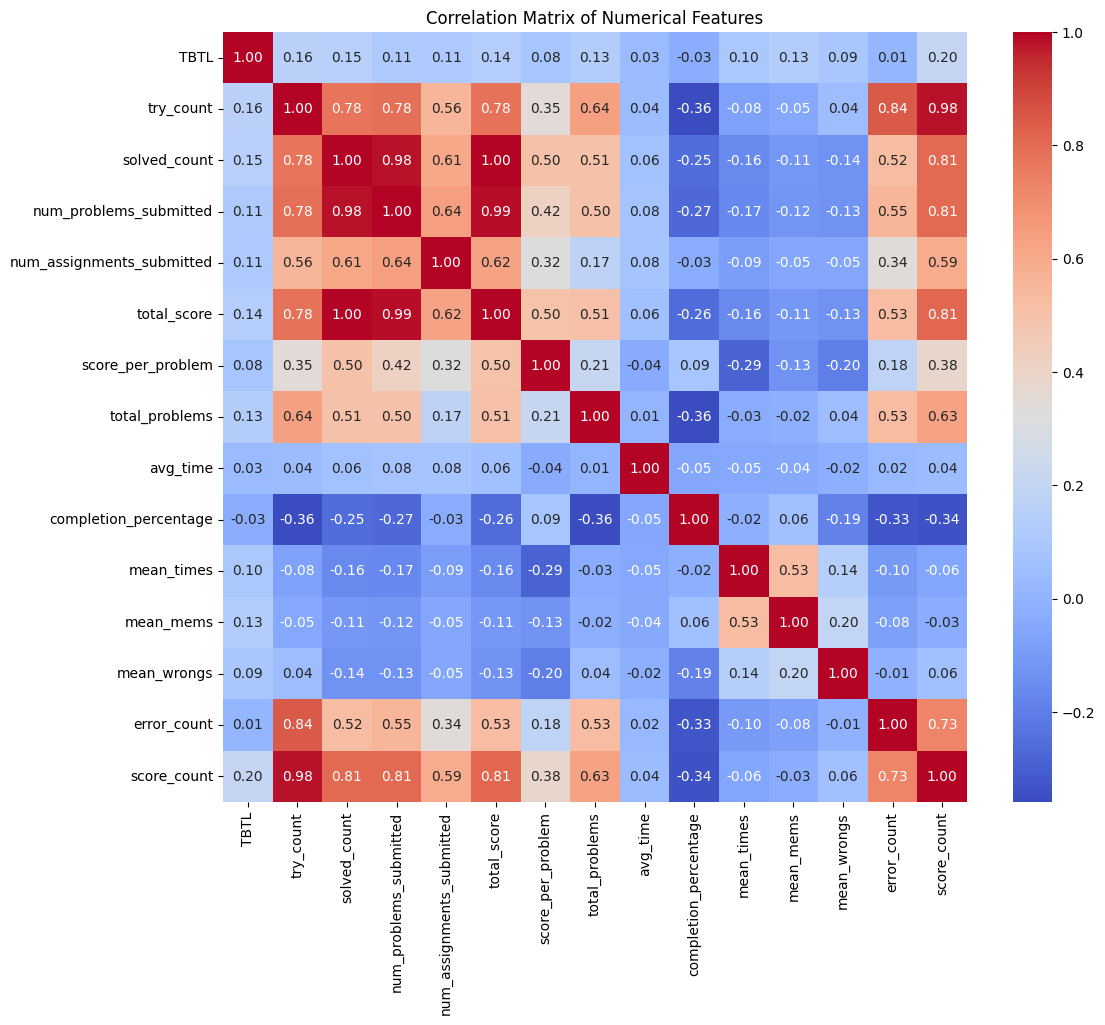

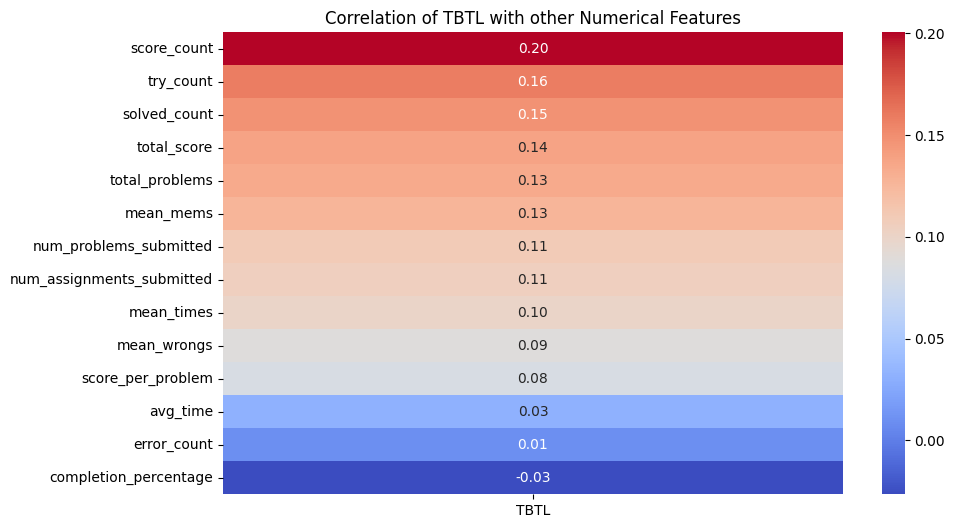

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for the heatmap
numerical_df = processed_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#To specifically visualize the correlation of 'TBTL' with other numerical columns:

plt.figure(figsize=(10, 6))
tbtl_corr = correlation_matrix['TBTL'].drop('TBTL') #exclude self correlation
tbtl_corr = tbtl_corr.sort_values(ascending=False) # order by magnitude
sns.heatmap(tbtl_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of TBTL with other Numerical Features')
plt.show()

In [ ]:
# Main execution flow
assignment_df = df_annonimized.groupby('assignment_id')['problem_id'].nunique().reset_index(name='num_problems')

processed_df = process_data(df_annonimized, df_ck, assignment_df , 'CK')


step 1: 
                                   username   CK
0  00b6dd4fc7eb817e03708c532016ef30ce564a61  5.5
1  00bef8afee8f3c595d535c9c03c490cac1a4f021  6.5
2  01122b3ef7e59b84189e65985305f575d6bdf83c  4.5
3  013de369c439ab0ead8aa7da64423aa395a8be39  5.0
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73  4.0
step 2: 
                                   username   CK  try_count
0  00b6dd4fc7eb817e03708c532016ef30ce564a61  5.5        147
1  00bef8afee8f3c595d535c9c03c490cac1a4f021  6.5        259
2  01122b3ef7e59b84189e65985305f575d6bdf83c  4.5        195
3  013de369c439ab0ead8aa7da64423aa395a8be39  5.0        107
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73  4.0        199
step 3: 
                                   username   CK  try_count  solved_count
0  00b6dd4fc7eb817e03708c532016ef30ce564a61  5.5        147          46.0
1  00bef8afee8f3c595d535c9c03c490cac1a4f021  6.5        259          72.0
2  01122b3ef7e59b84189e65985305f575d6bdf83c  4.5        195          59.0
3  013de369c439ab0ead8a

<ipython-input-28-415f860b2138>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_difference'] = (df['updated_at'] - df['created_at']).dt.total_seconds()


step 10: 
                                   username   CK  try_count  solved_count  \
0  00b6dd4fc7eb817e03708c532016ef30ce564a61  5.5        147          46.0   
1  00bef8afee8f3c595d535c9c03c490cac1a4f021  6.5        259          72.0   
2  01122b3ef7e59b84189e65985305f575d6bdf83c  4.5        195          59.0   
3  013de369c439ab0ead8aa7da64423aa395a8be39  5.0        107          58.0   
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73  4.0        199          79.0   

   num_problems_submitted  num_assignments_submitted  total_score  \
0                      45                          7     460000.0   
1                      78                          9     752499.0   
2                      65                          7     629214.0   
3                      52                          8     602519.0   
4                      90                          9     796000.0   

   score_per_problem  total_problems      avg_time  completion_percentage  \
0       10222.222222            109

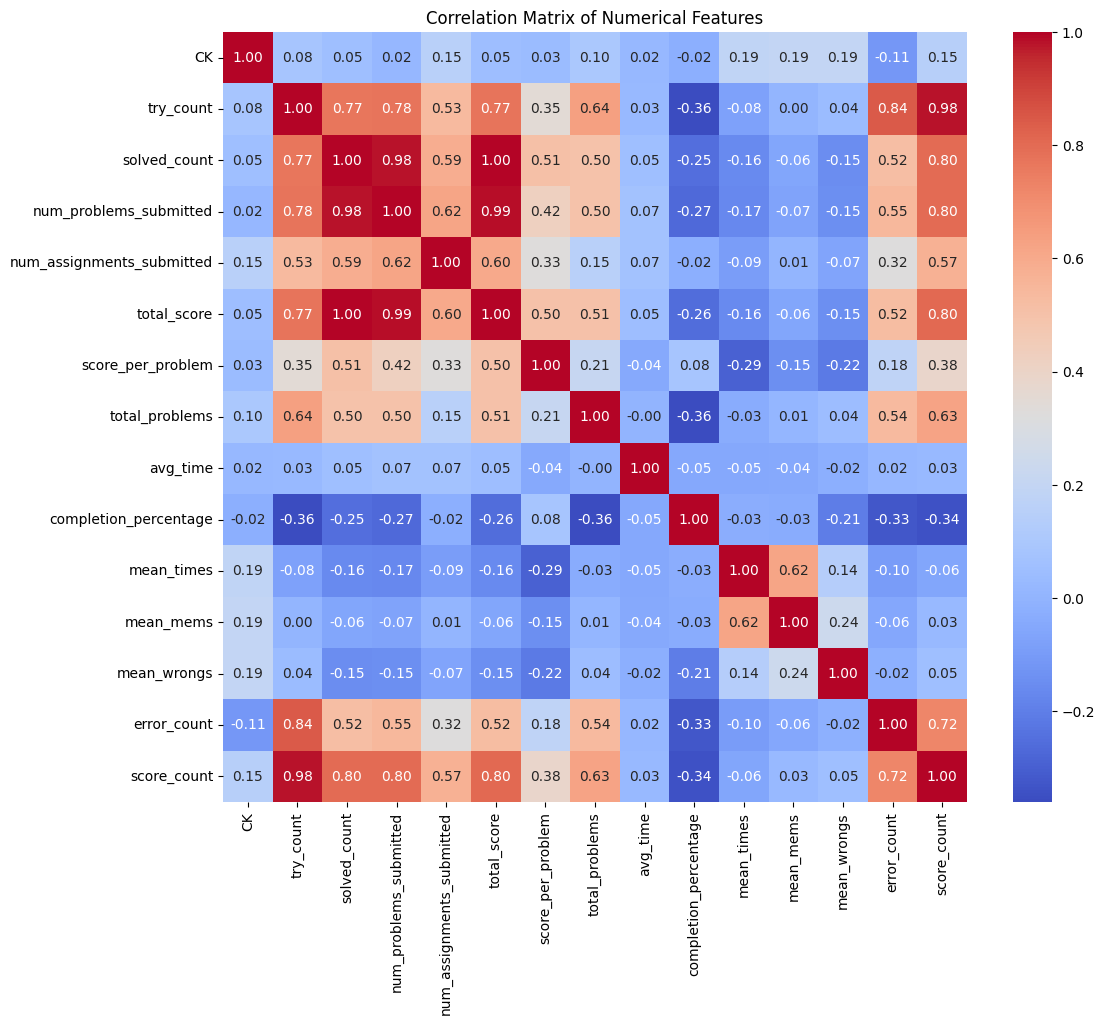

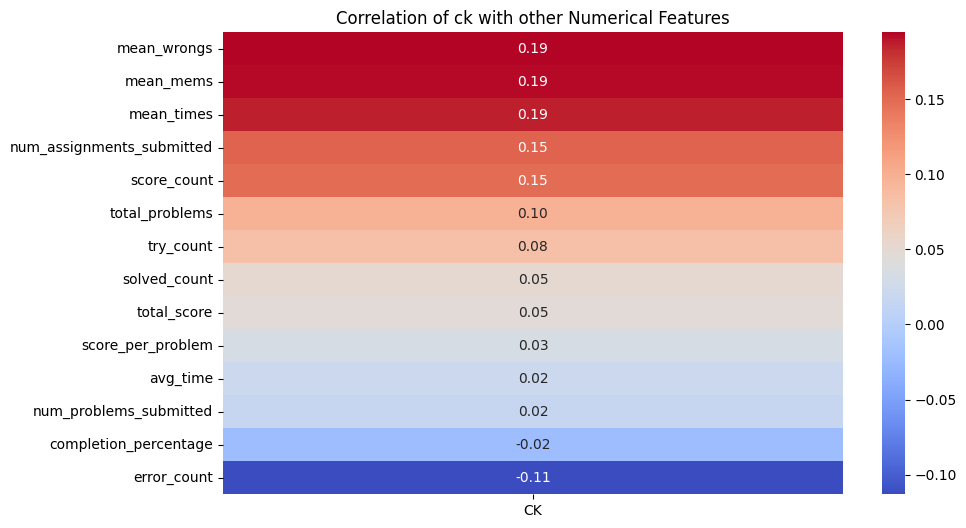

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for the heatmap
numerical_df = processed_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#To specifically visualize the correlation of 'TBTL' with other numerical columns:

plt.figure(figsize=(10, 6))
ck_corr = correlation_matrix['CK'].drop('CK') #exclude self correlation
ck_corr = ck_corr.sort_values(ascending=False) # order by magnitude
sns.heatmap(ck_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of ck with other Numerical Features')
plt.show()

In [ ]:
# Main execution flow
assignment_df = df_annonimized.groupby('assignment_id')['problem_id'].nunique().reset_index(name='num_problems')

processed_df = process_data(df_annonimized, df_qt, assignment_df , 'QT')


step 1: 
                                   username    QT
0  00b6dd4fc7eb817e03708c532016ef30ce564a61   7.5
1  00bef8afee8f3c595d535c9c03c490cac1a4f021   7.0
2  01122b3ef7e59b84189e65985305f575d6bdf83c   9.0
3  013de369c439ab0ead8aa7da64423aa395a8be39  10.0
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73   9.0
step 2: 
                                   username    QT  try_count
0  00b6dd4fc7eb817e03708c532016ef30ce564a61   7.5        147
1  00bef8afee8f3c595d535c9c03c490cac1a4f021   7.0        259
2  01122b3ef7e59b84189e65985305f575d6bdf83c   9.0        195
3  013de369c439ab0ead8aa7da64423aa395a8be39  10.0        107
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73   9.0        199
step 3: 
                                   username    QT  try_count  solved_count
0  00b6dd4fc7eb817e03708c532016ef30ce564a61   7.5        147          46.0
1  00bef8afee8f3c595d535c9c03c490cac1a4f021   7.0        259          72.0
2  01122b3ef7e59b84189e65985305f575d6bdf83c   9.0        195          59.0
3  013d

<ipython-input-28-415f860b2138>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_difference'] = (df['updated_at'] - df['created_at']).dt.total_seconds()


step 10: 
                                   username    QT  try_count  solved_count  \
0  00b6dd4fc7eb817e03708c532016ef30ce564a61   7.5        147          46.0   
1  00bef8afee8f3c595d535c9c03c490cac1a4f021   7.0        259          72.0   
2  01122b3ef7e59b84189e65985305f575d6bdf83c   9.0        195          59.0   
3  013de369c439ab0ead8aa7da64423aa395a8be39  10.0        107          58.0   
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73   9.0        199          79.0   

   num_problems_submitted  num_assignments_submitted  total_score  \
0                      45                          7     460000.0   
1                      78                          9     752499.0   
2                      65                          7     629214.0   
3                      52                          8     602519.0   
4                      90                          9     796000.0   

   score_per_problem  total_problems      avg_time  completion_percentage  \
0       10222.222222         

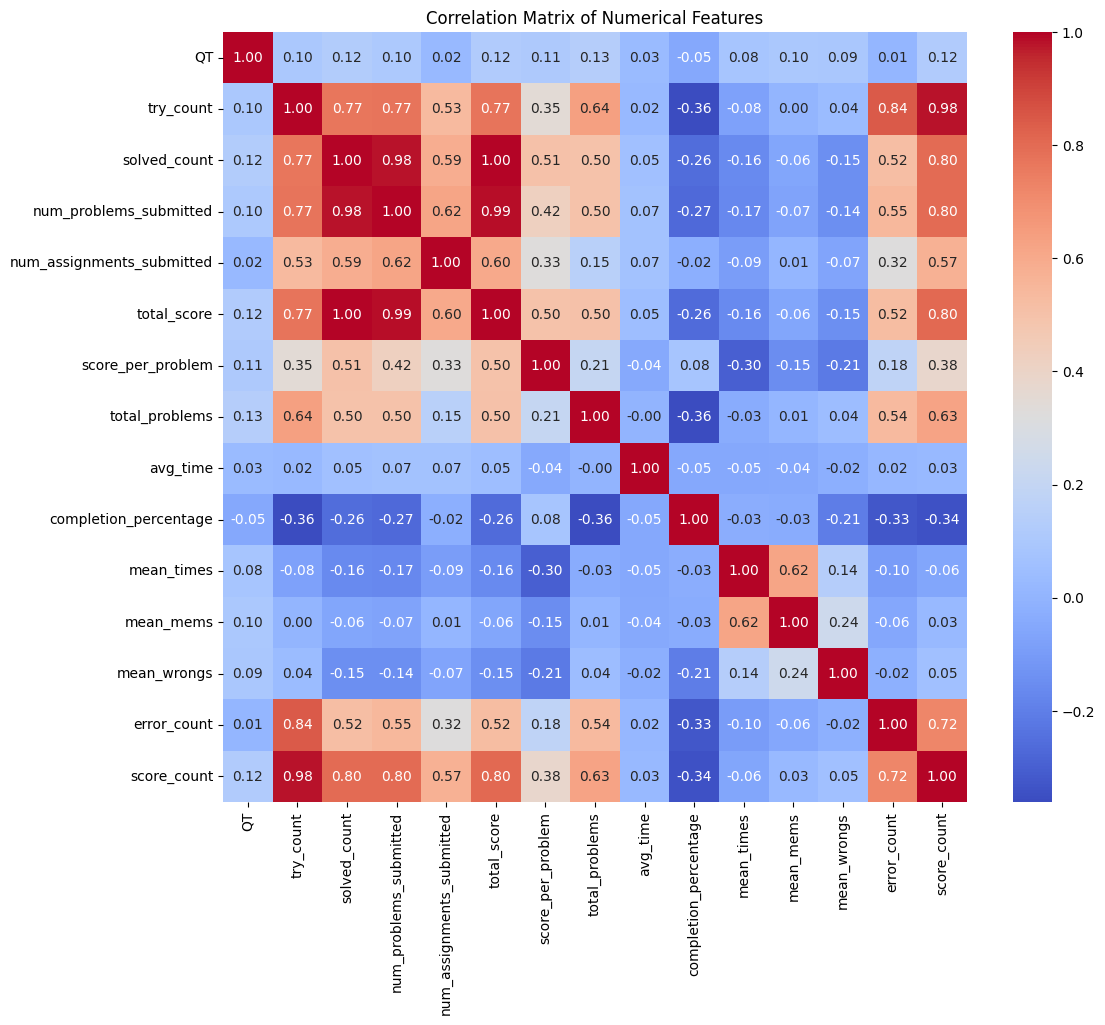

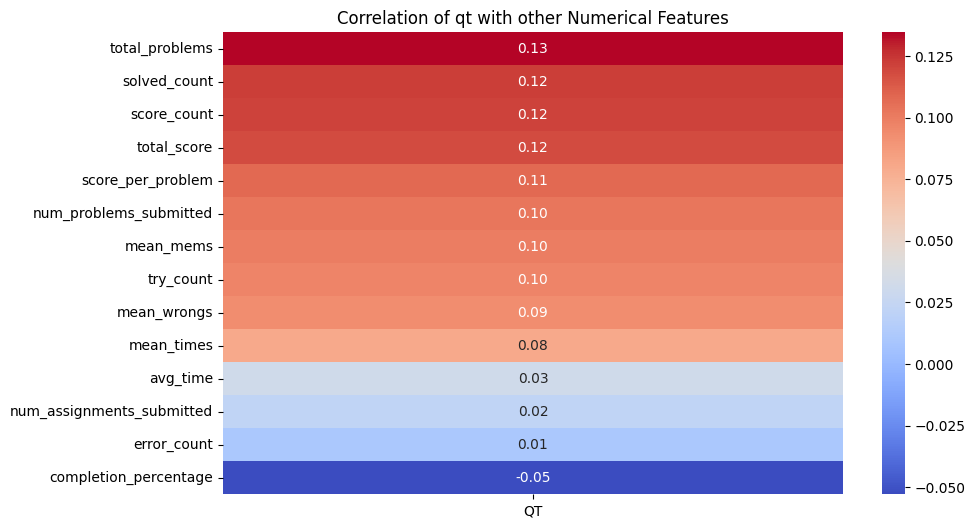

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for the heatmap
numerical_df = processed_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#To specifically visualize the correlation of 'qt' with other numerical columns:

plt.figure(figsize=(10, 6))
qt_corr = correlation_matrix['QT'].drop('QT') #exclude self correlation
qt_corr = qt_corr.sort_values(ascending=False) # order by magnitude
sns.heatmap(qt_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of qt with other Numerical Features')
plt.show()

In [ ]:
# Main execution flow
assignment_df = df_annonimized.groupby('assignment_id')['problem_id'].nunique().reset_index(name='num_problems')

processed_df = process_data(df_annonimized, df_th, assignment_df , 'TH')



step 1: 
                                   username    TH
0  00b6dd4fc7eb817e03708c532016ef30ce564a61   5.0
1  00bef8afee8f3c595d535c9c03c490cac1a4f021   8.5
2  01122b3ef7e59b84189e65985305f575d6bdf83c   7.0
3  013de369c439ab0ead8aa7da64423aa395a8be39  10.0
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73   6.0
step 2: 
                                   username    TH  try_count
0  00b6dd4fc7eb817e03708c532016ef30ce564a61   5.0        147
1  00bef8afee8f3c595d535c9c03c490cac1a4f021   8.5        259
2  01122b3ef7e59b84189e65985305f575d6bdf83c   7.0        195
3  013de369c439ab0ead8aa7da64423aa395a8be39  10.0        107
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73   6.0        199
step 3: 
                                   username    TH  try_count  solved_count
0  00b6dd4fc7eb817e03708c532016ef30ce564a61   5.0        147          46.0
1  00bef8afee8f3c595d535c9c03c490cac1a4f021   8.5        259          72.0
2  01122b3ef7e59b84189e65985305f575d6bdf83c   7.0        195          59.0
3  013d

<ipython-input-28-415f860b2138>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_difference'] = (df['updated_at'] - df['created_at']).dt.total_seconds()


step 10: 
                                   username    TH  try_count  solved_count  \
0  00b6dd4fc7eb817e03708c532016ef30ce564a61   5.0        147          46.0   
1  00bef8afee8f3c595d535c9c03c490cac1a4f021   8.5        259          72.0   
2  01122b3ef7e59b84189e65985305f575d6bdf83c   7.0        195          59.0   
3  013de369c439ab0ead8aa7da64423aa395a8be39  10.0        107          58.0   
4  014c59c6433fd764a0b08de6ffeb757eaf60aa73   6.0        199          79.0   

   num_problems_submitted  num_assignments_submitted  total_score  \
0                      45                          7     460000.0   
1                      78                          9     752499.0   
2                      65                          7     629214.0   
3                      52                          8     602519.0   
4                      90                          9     796000.0   

   score_per_problem  total_problems      avg_time  completion_percentage  \
0       10222.222222         

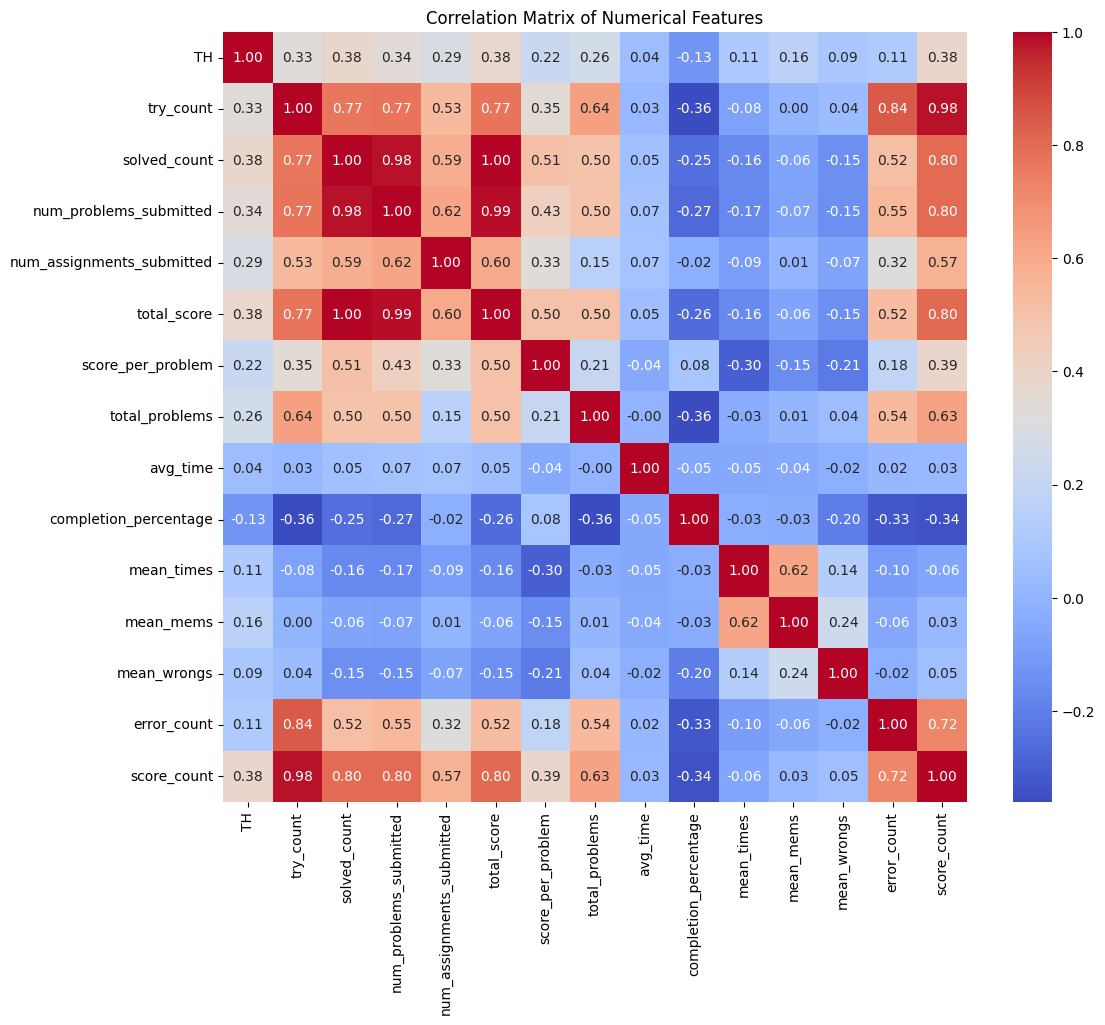

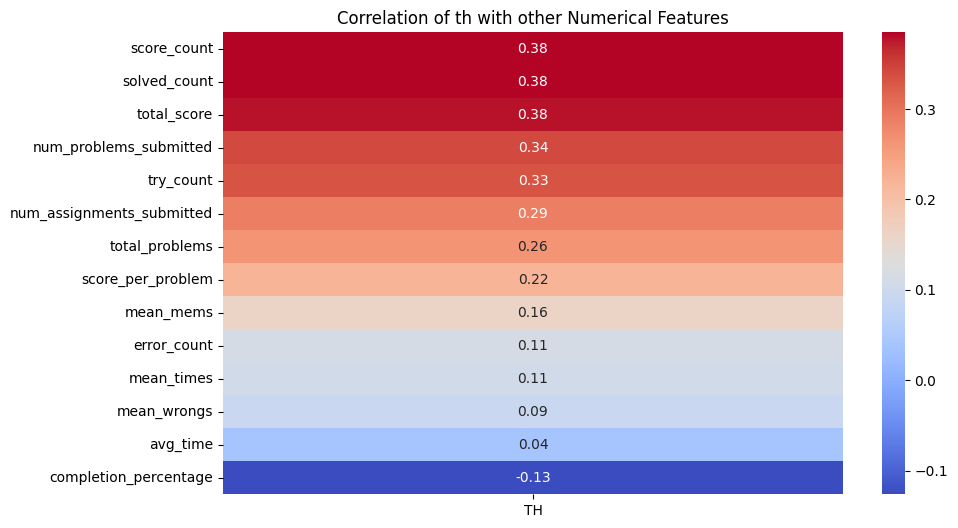

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for the heatmap
numerical_df = processed_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#To specifically visualize the correlation of 'th' with other numerical columns:

plt.figure(figsize=(10, 6))
th_corr = correlation_matrix['TH'].drop('TH') #exclude self correlation
th_corr = th_corr.sort_values(ascending=False) # order by magnitude
sns.heatmap(th_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of th with other Numerical Features')
plt.show()

#Train Models

## XGBoost

In [ ]:
# Step 4: Model training and evaluation
def train_xgboost_model(X_train, y_train, X_test, y_test):
    """
    Train an XGBoost model and evaluate its performance.

    Parameters:
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training target.
        X_test (np.ndarray): Testing features.
        y_test (np.ndarray): Testing target.

    Returns:
        xgb.Booster: Trained XGBoost model.
    """
    params = {
        'objective': 'reg:squarederror',
        'max_depth': 6,
        'gamma': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'eta': 0.01,
        'eval_metric': 'rmse'
    }

    train_data = xgb.DMatrix(X_train, label=y_train)
    test_data = xgb.DMatrix(X_test, label=y_test)

    evals = [(train_data, 'train'), (test_data, 'eval')]
    model = xgb.train(params, train_data, num_boost_round=100, evals=evals, early_stopping_rounds=50)

    y_pred = model.predict(test_data)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

In [ ]:
processed_df.head()

,username,TH,try_count,solved_count,num_problems_submitted,num_assignments_submitted,total_score,score_per_problem,total_problems,avg_time,completion_percentage,mean_times,mean_mems,mean_wrongs,error_count,score_count
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.24,147,46.0,45,7,460000.0,10222.222222,1093,8195.428571,4.208600,0.013624,91.583424,3.006803,28,119
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.11,259,72.0,78,9,752499.0,9647.423077,3180,9508.521236,2.366349,0.010982,172.903711,1.918919,50,209
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7.30,195,59.0,65,7,629214.0,9680.215385,19956,8874.158974,0.315301,0.017795,186.855543,4.615385,20,175
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,8.63,100,47.0,47,4,470000.0,10000.000000,1464,1514.090000,3.210383,0.006643,39.750857,1.640000,24,76
4,013de369c439ab0ead8aa7da64423aa395a8be39,8.20,107,58.0,52,8,602519.0,11586.903846,1619,184.037383,3.721550,0.031732,186.571709,1.691589,13,94


[0]	train-rmse:0.89928	eval-rmse:0.88086
[1]	train-rmse:0.89602	eval-rmse:0.87984
[2]	train-rmse:0.89286	eval-rmse:0.87829
[3]	train-rmse:0.88977	eval-rmse:0.87642
[4]	train-rmse:0.88705	eval-rmse:0.87472
[5]	train-rmse:0.88409	eval-rmse:0.87366
[6]	train-rmse:0.88175	eval-rmse:0.87263
[7]	train-rmse:0.87872	eval-rmse:0.87157
[8]	train-rmse:0.87547	eval-rmse:0.86886
[9]	train-rmse:0.87218	eval-rmse:0.86865
[10]	train-rmse:0.86935	eval-rmse:0.86810
[11]	train-rmse:0.86655	eval-rmse:0.86608
[12]	train-rmse:0.86340	eval-rmse:0.86440
[13]	train-rmse:0.86058	eval-rmse:0.86288
[14]	train-rmse:0.85776	eval-rmse:0.86077
[15]	train-rmse:0.85471	eval-rmse:0.85890
[16]	train-rmse:0.85229	eval-rmse:0.85777
[17]	train-rmse:0.84993	eval-rmse:0.85643
[18]	train-rmse:0.84690	eval-rmse:0.85506
[19]	train-rmse:0.84450	eval-rmse:0.85385
[20]	train-rmse:0.84184	eval-rmse:0.85296
[21]	train-rmse:0.83909	eval-rmse:0.85130
[22]	train-rmse:0.83633	eval-rmse:0.85026
[23]	train-rmse:0.83463	eval-rmse:0.84888
[2

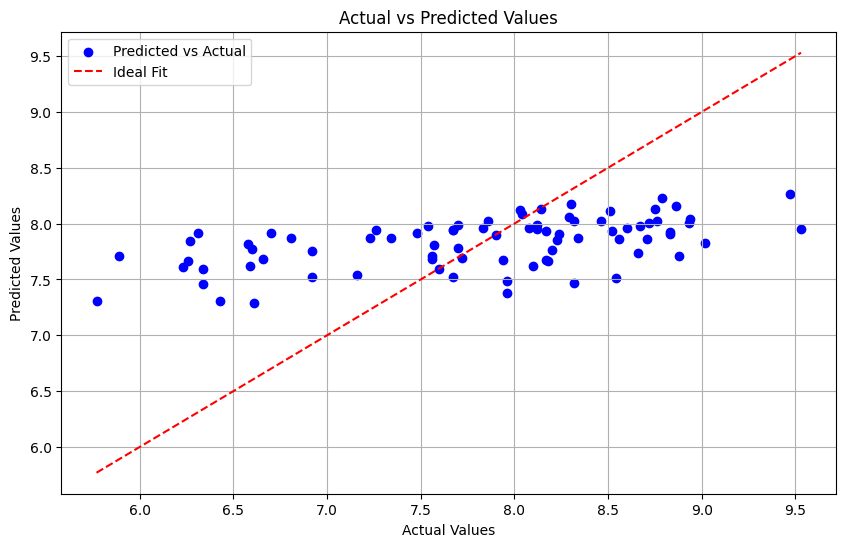

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Handle missing values
imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
X_imputed = imputer.fit_transform(processed_df.drop(columns=['username','TH']))
y = processed_df['TH']  # Replace with actual target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the XGBoost model
model = train_xgboost_model(X_train_scaled, y_train, X_test_scaled, y_test)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# predict_df = df[~df['username'].isin(df_tl['username'])]
# unique_usernames_df = predict_df[['username']].drop_duplicates().reset_index(drop=True)

# Adjust create_predict_csv for CNN
def create_predict_csv(predict_df, df, model):

    # Process raw data (same as before)
    raw = predict_df.copy()
    raw = add_try_count(raw, df_annonimized)
    raw = add_solved_count(raw, df_annonimized)
    raw = add_submission_counts(raw, df_annonimized)
    raw = calculate_total_score(raw, df_annonimized)
    raw = calculate_score_per_problem(raw)
    raw = add_problem_statistics(raw, df_annonimized, assignment_df)
    raw = average_time_per_user(raw, df_annonimized)
    raw = calculate_completion_percentage(raw)
    username_metrics = process_username_metrics(df_annonimized)
    raw = pd.merge(raw, username_metrics, on='username', how='left')
    #raw head o day

    # Prepare data for prediction
    usernames = raw['username']  # Save usernames for the final output
    imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
    X_predict = imputer.fit_transform(raw.drop(columns=['username']))
    y = processed_df['TH']  # Replace with actual target
    # Scale and reshape data
    X_predict = scaler.transform(X_predict)
    # Predict TBTL using the trained model
    X_predict = xgb.DMatrix(X_predict)
    TBTL_predictions = model.predict(X_predict)

    # Create a DataFrame with MSSV and predicted TBTL
    results_df = pd.DataFrame({
        'username': usernames,
        'TBTL': TBTL_predictions
    })
    results_df['TBTL'] = results_df['TBTL'].round(2)  # Round TBTL to 2 decimal places

    return results_df
# Assuming df and df_tl are defined somewhere in your code
predict_df = df_annonimized[~df_annonimized['username'].isin(df_tbtl['username'])]
unique_usernames_df = predict_df[['username']].drop_duplicates().reset_index(drop=True)
result = create_predict_csv(unique_usernames_df, df_annonimized, model)
result.to_csv('result_tbtl.csv', index=False, header=False)

<ipython-input-15-1f9a9de1c3ac>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_difference'] = (df['updated_at'] - df['created_at']).dt.total_seconds()


##Ensemble

###xgb , lr , rf

In [ ]:
def train_ensemble_model(X_train, y_train, X_test, y_test):
    """
    Train an ensemble model using VotingRegressor with multiple base models.

    Parameters:
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training target.
        X_test (np.ndarray): Testing features.
        y_test (np.ndarray): Testing target.

    Returns:
        VotingRegressor: Trained ensemble model.
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor

    # Define base models
    lr_model = LinearRegression()
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=6, eta=0.01, random_state=42)

    # Create ensemble model
    ensemble = VotingRegressor(estimators=[
        ('linear_regression', lr_model),
        ('random_forest', rf_model),
        ('xgboost', xgb_model)
    ])

    # Train ensemble model
    ensemble.fit(X_train, y_train)

    # Evaluate ensemble model
    y_pred = ensemble.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Ensemble Model - Root Mean Squared Error (RMSE): {rmse}")
    print(f"Ensemble Model - R^2 Score: {r2}")

    return ensemble


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Handle missing values
imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
X_imputed = imputer.fit_transform(processed_df.drop(columns=['username']))
y = processed_df['completion_percentage']  # Replace with actual target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Polynomial Features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Train the XGBoost model
model = train_ensemble_model(X_train_poly, y_train, X_test_poly, y_test)


TypeError: C variable sklearn.utils._random.DEFAULT_SEED has wrong signature (expected __pyx_t_7sklearn_5utils_7_random_UINT32_t, got __pyx_t_7sklearn_5utils_9_typedefs_uint32_t)